# TPSC approximation
Author: [Niklas Witt](mailto:niklas.witt@physik.uni-hamburg.de)

## Theory of TPSC

The Two-Particle Self-Consistent (TPSC) approximation is a non-perturbative semi-analytical method that was first introduced by Vilk and Tremblay {cite:p}`Vilk1997`. TPSC can be used to study magnetic fluctuations, while it also obeys the Mermin-Wagner theorem in two dimensions, i.e., a phase transtition at finite temperatures is prohibited. In addition, the TPSC method satisfies several conservation laws, sum rules and the Pauli principle (actually, it is constructed in a way to fulfill these, since they are used to determine model parameters self-consistently). TPSC is applicable in the weak to intermediate coupling regime, but it breaks down in the strong coupling regime and it cannot describe the Mott transition unlike other non-perturbative methods like Dynamical Mean-Field Theory (DMFT).

For a (pedagogical) review, please have a look at {cite:p}`Allen2004,Trembley2012` for the single-orbital case implemented here and {cite:p}`Zantout2021` for the more complex multi-orbital theory.


#### Set of TPSC equations
We review the set of equations that need to be solved in the TPSC approximation assuming a one-band Hubbard model with interaction $U$ (it is not so easy to extend TPSC to models with more parameters, since sum rules to determine the additional parameters self-consistently need to be found) in the paramagnetic phase (SU(2) symmetric), i.e., $n = \langle n\rangle = 2n_{\sigma}$ for the electron filling $n$. TPSC is constructed in a way to fulfill certain sum rules and the Pauli principle in the form $\langle n^2\rangle = \langle n\rangle$. The control quantitites are spin and charge correlation function (susceptibilities) which are evaluated in a Random-Phase-Approximation (RPA) like fashion

$$ \chi_{\mathrm{sp}}^{\mathrm{RPA}}(i\nu_m, \boldsymbol{q}) = \frac{\chi_0(i\nu_m, \boldsymbol{q})}{1-U\chi_0(i\nu_m, \boldsymbol{q})}\;,\quad \chi_{\mathrm{ch}}^{\mathrm{RPA}}(i\nu_m, \boldsymbol{q}) = \frac{\chi_0(i\nu_m, \boldsymbol{q})}{1+U\chi_0(i\nu_m, \boldsymbol{q})} $$

with the irreducible susceptibility ("bubble diagram")

$$ \chi_0(i\nu_m, \boldsymbol{q}) = - \frac{T}{N_{\boldsymbol{k}}} \sum_{n,\boldsymbol{k}} G(i\omega_n + i\nu_m, \boldsymbol{k} + \boldsymbol{q})G(i\omega_n, \boldsymbol{k})\;,$$

where $i\nu_m = 2n\pi T$ [$i\omega_n=(2n+1)\pi T$] and $\boldsymbol{q}$ [$\boldsymbol{k}$] are bosonic [fermionic] Matsubara frequencies and momentum at temperature $T$, $N_{\boldsymbol{k}}$ denotes the number of $\boldsymbol{k}$-points, and $G_0(i\omega_n,\boldsymbol{k}) = [i\omega_n - (\varepsilon_{\boldsymbol{k}}-\mu)]^{-1}$ is the bare (non-interacting) Green function with with single-particle dispersion $\varepsilon_{\boldsymbol{k}}$ and chemical potential $\mu$. Please note that sometimes a factor of 2 is included in the definition of $\chi_0$ leading to slightly different factors in all equations given here. The convolution sum to calculate $\chi_0$ can be easily evaluated by Fourier transforming to imaginary time and real space, resulting in a simple multiplication

$$ \chi_0(\tau, \boldsymbol{r}) = - G(\tau, \boldsymbol{r})G(-\tau,-\boldsymbol{r}) = G(\tau, \boldsymbol{r})G(\beta-\tau,\boldsymbol{r})\;.$$

In our practical implementation, we will perform this step using the `sparse-ir` package. A similar calculation is necessary to set the chemical potential $\mu$ for fixed electron density $n$, as 

$$ n = 2n_{\sigma} = 2 - \frac{2}{N_{\boldsymbol{k}}} \sum_{\boldsymbol{k}} G(\tau=0^+, \boldsymbol{k}) $$

with a factor 2 from spin degeneracy and $0^+ = \lim_{\eta\to 0+} \eta$ needs to be solved by using some root finding algorithm like bisection method or Brent's method. The Fourier transformation to $\tau=0^+$ can be easily performed with the `sparse-ir` package.

The above RPA definition of spin and charge susceptibility violate the Pauli principle. In TPSC, we overcome this problem by introducing two effective, renormalized interactions ("irreducible vertices") $U_{\mathrm{sp}}$ and $U_{\mathrm{ch}}$ that enter spin and charge correlation functions as 

$$ \chi_{\mathrm{sp}}(i\nu_m, \boldsymbol{q}) = \frac{\chi_0(i\nu_m, \boldsymbol{q})}{1-U_{\mathrm{sp}}\chi_0(i\nu_m, \boldsymbol{q})}\;,\quad \chi_{\mathrm{ch}}(i\nu_m, \boldsymbol{q}) = \frac{\chi_0(i\nu_m, \boldsymbol{q})}{1+U_{\mathrm{ch}}\chi_0(i\nu_m, \boldsymbol{q})}\,. $$

These two effetive interactions are determined by the two local sum rules 

$$
\begin{align}
    2 \frac{T}{N_{\boldsymbol{k}}} \sum_{m,\boldsymbol{q}} \chi_{\mathrm{sp}} &= \left\langle (n_{\uparrow} - n_{\downarrow})^2\right\rangle = n - 2\langle n_{\uparrow}n_{\downarrow}\rangle\;,\\
    2 \frac{T}{N_{\boldsymbol{k}}} \sum_{m,\boldsymbol{q}} \chi_{\mathrm{ch}} &= \left\langle (n_{\uparrow} + n_{\downarrow})^2\right\rangle - \left\langle n_{\uparrow} + n_{\downarrow}\right\rangle^2 =  n + 2\langle n_{\uparrow}n_{\downarrow}\rangle - n^2\;.
\end{align}
$$

Both sum rules can be exactly derived from the Pauli principle ($\langle n^2\rangle = \langle n\rangle$). In principle, we could now determine $U_{\mathrm{sp}}$ and $U_{\mathrm{ch}}$ from local-spin and local-charge sum rule if we knew the double occupancy $\langle n_{\uparrow}n_{\downarrow}\rangle$. TPSC makes the ansatz

$$ U_{\mathrm{sp}}\langle n_{\uparrow}\rangle\langle n_{\downarrow}\rangle = U_{\mathrm{sp}}\frac{n^2}{4} = U\langle n_{\uparrow}n_{\downarrow}\rangle\;,$$ 

which reproduces Kanamori-Brueckner type screening. The four equations above form a set of self-consistent equations for either $U_{\mathrm{sp}}$ or equivalently $\langle n_{\uparrow}n_{\downarrow}\rangle$. In practice, we treat $U_{\mathrm{sp}}$ as the parameter to be determined self-consistently by inserting the ansatz in the local-spin sum rule. Effectively, we then need to find the root of the function

$$ f(U_{\mathrm{sp}}) = 2\frac{T}{N_{\boldsymbol{k}}} \sum_{m,\boldsymbol{q}}\chi_{\mathrm{sp}}(U_{\mathrm{sp}}) - n + \frac{U_{\mathrm{sp}}}{2U}n^2\;. $$

Afterwards we can calculate the double occupancy $\langle n_{\uparrow}n_{\downarrow}\rangle = \frac{U_{\mathrm{sp}}}{4U} n^2$ and then perform a similar root finding for $U_{\mathrm{ch}}$ from the function 

$$ g(U_{\mathrm{ch}}) = 2 \frac{T}{N_{\boldsymbol{k}}} \sum_{m,\boldsymbol{q}} \chi_{\mathrm{ch}}(U_{\mathrm{ch}}) - n - 2\langle n_{\uparrow}n_{\downarrow}\rangle^2 + n^2\;. $$

In TPSC, a self-energy $\Sigma$ can be derived that is calculated from the interaction {cite:p}`Moukouri2000`

$$ V(i\nu_m, \boldsymbol{q}) = \frac{U}{4} \left(3 U_{\mathrm{sp}} \chi_{\mathrm{s}}(i\nu_m, \boldsymbol{q}) + U_{\mathrm{ch}} \chi_{\mathrm{ch}}(i\nu_m, \boldsymbol{q})\right) + U\;. $$

The self-energy itself is given by a convolution in $(i\omega_n, \boldsymbol{k})$ space

$$ \Sigma(i\omega_n, \boldsymbol{k}) = \frac{T}{N_{\boldsymbol{k}}} \sum_{m,\boldsymbol{q}} V(i\nu_m, \boldsymbol{q}) G(i\omega_n - i\nu_m, \boldsymbol{k} - \boldsymbol{q}) $$

which Fourier transformed to $(\tau,\boldsymbol{r})$ space takes the form

$$ \Sigma(\tau, \boldsymbol{r}) = V(\tau, \boldsymbol{r}) G(\tau, \boldsymbol{r})\;. $$ 

The interacting Green function is determined by the Dyson equation

$$
\begin{align}
G(i\omega_n,\boldsymbol{k}) &= [G_0^{-1}(i\omega_n,\boldsymbol{k}) - \Sigma(i\omega_n,\boldsymbol{k})]^{-1} \\
& = [i\omega_n - (\varepsilon_{\boldsymbol{k}}-\mu)) - \Sigma(i\omega_n,\boldsymbol{k})]^{-1}.
\end{align}
$$



#### Practical implementation
When implementing the TPSC, a few points need to be treated carefully which we discuss in the following.

* The constant Hartree term $V_{\mathrm{H}} = U$ in the interaction $V$ and respective self-energy term $\Sigma_H = U n_{\sigma} = U\frac{n}{2}$ can be absorbed into the definition of the chemical potential $\mu$.
* An upper bound for the renormalized spin vertex $U_{\mathrm{sp}}$ exists. Since the denominator spin susceptibility $\chi_{\mathrm{sp}}$ should not diverge, the upper bound is given by the RPA critical interaction value $U_{\mathrm{crit}} = 1/\mathrm{max}\{\chi^0\}$. Mathematically, the function $f(U_{\mathrm{sp}}) = 2\sum \chi_{\mathrm{sp}}(U_{\mathrm{sp}}) - n + \frac{U_{\mathrm{sp}}}{2U}n^2$, from which $U_{\mathrm{sp}}$ is determined, turns unstable for $U_{\mathrm{sp}} \geq U_{\mathrm{crit}}$ (try plotting $f(U_{\mathrm{sp}})$!). At this point, TPSC is not applicable and, e.g., the temperature $T$ is too low or the (unrenormalized) interaction $U$ too large.
* An internal accuracy check $\frac{1}{2}\mathrm{Tr}(\Sigma G) = U \langle n_{\uparrow} n_{\downarrow}\rangle$ can be employed to test the validity of TPSC.

## Code implementation
We are implementing TPSC for the simple case of a square lattice model with dispersion $\varepsilon_{\boldsymbol{k}} = -2t\,[\cos(k_x) + \cos(k_y)]$ with nearest-neighbor hopping $t$ which sets the energy scale of our system (bandwidth $W = 8t$). First, we load all necessary basic modules that we are going to need in implementing TPSC and visualizing results:

In [1]:
import numpy as np
import scipy as sc
import scipy.optimize
from warnings import warn
import sparse_ir
%matplotlib inline
import matplotlib.pyplot as plt

#### Parameter setting

In [2]:
### System parameters
t    = 1      # hopping amplitude
W    = 8*t    # bandwidth
wmax = 10     # set wmax >= W

T    = 0.1    # temperature
beta = 1/T    # inverse temperature
n    = 0.85   # electron filling, here per spin per lattice site (n=1: half filling)
U    = 4      # Hubbard interaction

### Numerical parameters
nk1, nk2  = 24, 24    # number of k_points along one repiprocal crystal lattice direction k1 = kx, k2 = ky
nk        = nk1*nk2
IR_tol    = 1e-10     # accuary for l-cutoff of IR basis functions

#### Generating meshes
We need to generate a $\boldsymbol{k}$-mesh as well as set up the IR basis functions on a sparse $\tau$ and $i\omega_n$ grid. Then we can calculate the dispersion on this mesh.
In addition, we set calculation routines to Fourier transform $k\leftrightarrow r$ and $\tau\leftrightarrow i\omega_n$ (via IR basis).

In [3]:
#### Initiate fermionic and bosonic IR basis objects
IR_basis_set = sparse_ir.FiniteTempBasisSet(beta, wmax, eps=IR_tol)

class Mesh:
    """
    Holding class for k-mesh and sparsely sampled imaginary time 'tau' / Matsubara frequency 'iw_n' grids.
    Additionally it defines the Fourier transform routines 'r <-> k'  and 'tau <-> l <-> wn'.
    """
    def __init__(self,IR_basis_set,nk1,nk2):
        self.IR_basis_set = IR_basis_set

        # generate k-mesh and dispersion
        self.nk1, self.nk2, self.nk = nk1, nk2, nk1*nk2
        self.k1, self.k2 = np.meshgrid(np.arange(self.nk1)/self.nk1, np.arange(self.nk2)/self.nk2)
        self.ek = -2*t*( np.cos(2*np.pi*self.k1) + np.cos(2*np.pi*self.k2) ).reshape(nk)

        # lowest Matsubara frequency index
        self.iw0_f = np.where(self.IR_basis_set.wn_f == 1)[0][0]
        self.iw0_b = np.where(self.IR_basis_set.wn_b == 0)[0][0]

        ### Generate a frequency-momentum grid for iw_n and ek (in preparation for calculating the Green function)
        # frequency mesh (for Green function)
        self.iwn_f = 1j * self.IR_basis_set.wn_f * np.pi * T
        self.iwn_f_ = np.tensordot(self.iwn_f, np.ones(nk), axes=0)

        # ek mesh
        self.ek_ = np.tensordot(np.ones(len(self.iwn_f)), self.ek, axes=0)

    def smpl_obj(self, statistics):
        """ Return sampling object for given statistic """
        smpl_tau = {'F': self.IR_basis_set.smpl_tau_f, 'B': self.IR_basis_set.smpl_tau_b}[statistics]
        smpl_wn  = {'F': self.IR_basis_set.smpl_wn_f,  'B': self.IR_basis_set.smpl_wn_b }[statistics]
        return smpl_tau, smpl_wn

    
    def tau_to_wn(self, statistics, obj_tau):
        """ Fourier transform from tau to iw_n via IR basis """
        smpl_tau, smpl_wn = self.smpl_obj(statistics)

        obj_tau = obj_tau.reshape((smpl_tau.tau.size, self.nk1, self.nk2))
        obj_l   = smpl_tau.fit(obj_tau, axis=0)
        obj_wn  = smpl_wn.evaluate(obj_l, axis=0).reshape((smpl_wn.wn.size, self.nk))
        return obj_wn

    def wn_to_tau(self, statistics, obj_wn):
        """ Fourier transform from tau to iw_n via IR basis """
        smpl_tau, smpl_wn = self.smpl_obj(statistics)

        obj_wn  = obj_wn.reshape((smpl_wn.wn.size, self.nk1, self.nk2))
        obj_l   = smpl_wn.fit(obj_wn, axis=0)
        obj_tau = smpl_tau.evaluate(obj_l, axis=0).reshape((smpl_tau.tau.size, self.nk))
        return obj_tau

    
    def k_to_r(self,obj_k):
        """ Fourier transform from k-space to real space """
        obj_k = obj_k.reshape(-1, self.nk1, self.nk2)
        obj_r = np.fft.fftn(obj_k,axes=(1,2))
        obj_r = obj_r.reshape(-1, self.nk)
        return obj_r

    def r_to_k(self,obj_r):
        """ Fourier transform from real space to k-space """
        obj_r = obj_r.reshape(-1, self.nk1, self.nk2)
        obj_k = np.fft.ifftn(obj_r,axes=(1,2))/self.nk
        obj_k = obj_k.reshape(-1, self.nk)
        return obj_k

#### TPSC solver
We wrap the calculation steps of TPSC (i.e. determining $U_{\mathrm{sp}},U_{\mathrm{ch}}$) in a Solver class. We use the `Mesh` class defined above to perform calculation steps.

In [4]:
class TPSCSolver:
    def __init__(self, mesh, U, n, U_sfc_tol=1e-12, verbose=True):
        """
        Solver class to calculate the TPSC method.
        After initializing the Solver by `solver = TPSCSolver(mesh, U, n, **kwargs)` it 
        can be run by `solver.solve()`.
        """
        ## set internal parameters for the solve 
        self.U = U
        self.n = n
        self.mesh = mesh
        self.U_sfc_tol = U_sfc_tol
        self.verbose = verbose
        
        ## set initial Green function and irreducible susceptibility
        # NOT running the TPSCSolver.solve instance corresponds to staying on RPA level
        self.sigma = 0
        
        self.mu = 0
        self.mu_calc()
        
        self.gkio_calc(self.mu)
        self.grit_calc()
        self.ckio_calc()
        
        # determine critical U_crit = 1/max(chi0) as an upper bound to U_sp
        self.U_crit = 1/np.amax(self.ckio.real)
    
    
    #%%%%%%%%%%% Solving instance
    def solve(self):
        """
        Determine spin and charge vertex self-consistently from sum rules and calculate self-energy.
        """
        # determine spin vertex U_sp
        self.spin_vertex_calc()
        
        # set double occupancy from Kanamori-Bruckner screening
        self.docc_calc()
 
        # determine charge vertex U_ch
        self.charge_vertex_calc()
        
        # set spin and charge susceptibility
        self.chi_spin   = self.RPA_term_calc( self.U_sp)
        self.chi_charge = self.RPA_term_calc(-self.U_ch)

        # calculate interaction, self-energy and interacting Green function
        self.V_calc()
        self.sigma_calc()
        self.mu_calc()
        self.gkio_calc(self.mu)
    
    #%%%%%%%%%%% Calculation steps for self.energy
    def gkio_calc(self, mu):
        """ Calculate Green function G(iw,k) """
        self.gkio = (self.mesh.iwn_f_ - (self.mesh.ek_ - mu) - self.sigma)**(-1)

    def grit_calc(self):
        """ Calculate real space Green function G(tau,r) [for calculating chi0 and sigma] """
        # Fourier transform
        grit = self.mesh.k_to_r(self.gkio)
        self.grit = self.mesh.wn_to_tau('F', grit)

    def ckio_calc(self):
        """ Calculate irreducible susciptibility chi0(iv,q) """
        ckio = self.grit * self.grit[::-1, :]

        # Fourier transform
        ckio = self.mesh.r_to_k(ckio)
        self.ckio = self.mesh.tau_to_wn('B', ckio)

    def V_calc(self):
        """ Calculate interaction V(tau,r) from RPA-like spin and charge susceptibility """
        V = self.U/4 * (3*self.U_sp*self.chi_spin + self.U_ch*self.chi_charge)
        # Constant Hartree Term V ~ U needs to be treated extra, since they cannot be modeled by the IR basis.
        # In the single-band case, the Hartree term can be absorbed into the chemical potential.

        # Fourier transform
        V = self.mesh.k_to_r(V)
        self.V = self.mesh.wn_to_tau('B', V)

    def sigma_calc(self):
        """ Calculate self-energy Sigma(iwn,k) """
        sigma = self.V * self.grit
    
        # Fourier transform
        sigma = self.mesh.r_to_k(sigma)
        self.sigma = self.mesh.tau_to_wn('F', sigma)


    #%%%%%%%%%%% Determining spin and charge vertex
    def RPA_term_calc(self, U):
        """ Set RPA-like susceptibility """
        chi_RPA = self.ckio / (1 - U*self.ckio)
        return chi_RPA     
    
    def chi_qtrace_calc(self, U):
        """ Calculate (iv_m, q) trace of chi_RPA term """
        # chi_qtrace = sum_(m,q) chi(iv_m,q)
        chi_RPA = self.RPA_term_calc(U)
        chi_trace = np.sum(chi_RPA, axis=1)/self.mesh.nk
        chi_trace_l  = self.mesh.IR_basis_set.smpl_wn_b.fit(chi_trace)
        chi_trace = self.mesh.IR_basis_set.basis_b.u(0)@chi_trace_l
        return chi_trace.real
    
    def docc_calc(self):
        """ Calculate double occupancy from Kanamori-Bruckner type screening """
        self.docc = 0.25 * self.U_sp/self.U * self.n**2
    
    def spin_vertex_calc(self):
        """ Determine self-consistently from sum rule """
        # interval [U_a, U_b] for root finding
        U_a = 0
        U_b = np.floor(self.U_crit*100)/100
        
        chi_trace = self.chi_qtrace_calc
        sfc_eq = lambda U_sp : 2*chi_trace(U_sp) - self.n + 0.5*(U_sp/self.U)*self.n**2

        if sfc_eq(U_b) > 0:        
            self.U_sp = sc.optimize.brentq(sfc_eq, U_a, U_b, rtol = self.U_sfc_tol)
        else:
            warn("System underwent phase transition, U^sp > U_crit = {}! U is too large or T too low for given doping.".format(self.U_crit))
    
    def charge_vertex_calc(self):
        """ Determine self-consistently from sum rule """
        # interval [U_a, U_b] for root finding
        U_a = 0
        U_b = 100
        
        chi_trace = self.chi_qtrace_calc
        sfc_eq = lambda U_ch : 2*chi_trace(-U_ch) - self.n + (1 - 2*self.docc)*self.n**2

        self.U_ch = sc.optimize.brentq(sfc_eq, U_a, U_b, rtol = self.U_sfc_tol)

        
    #%%%%%%%%%%% Setting chemical potential mu
    def calc_electron_density(self, mu):
        """ Calculate chemical potential mu from Green function """
        self.gkio_calc(mu)
        gio  = np.sum(self.gkio,axis=1)/self.mesh.nk
        g_l  = self.mesh.IR_basis_set.smpl_wn_f.fit(gio)
        g_tau0 = self.mesh.IR_basis_set.basis_f.u(0)@g_l
    
        n  = 1 + np.real(g_tau0)
        n  = 2*n #for spin
        return n

    def mu_calc(self):
        """ Find chemical potential for a given filling n0 via brentq root finding algorithm """
        n_calc = self.calc_electron_density
        n0 = self.n
        f  = lambda mu : n_calc(mu) - n0

        self.mu = sc.optimize.brentq(f, np.amax(self.mesh.ek)*3, np.amin(self.mesh.ek)*3)

### Execute TPSC solver

In [5]:
# initialize calculation
IR_basis_set = sparse_ir.FiniteTempBasisSet(beta, wmax, eps=IR_tol)
mesh = Mesh(IR_basis_set, nk1, nk2)
solver = TPSCSolver(mesh, U, n)

# perform TPSC calculations
solver.solve()

#### Visualize results

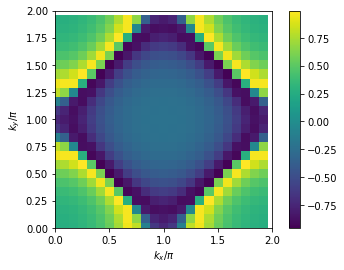

In [6]:
# plot 2D k-dependence of lowest Matsubara frequency of e.g. green function
plt.pcolormesh(2*mesh.k1.reshape(nk1,nk2), 2*mesh.k2.reshape(nk1,nk2), np.real(solver.gkio[mesh.iw0_f].reshape(mesh.nk1,mesh.nk2)), shading='auto')
ax = plt.gca()
ax.set_xlabel('$k_x/\pi$')
ax.set_xlim([0,2])
ax.set_ylabel('$k_y/\pi$')
ax.set_ylim([0,2])
ax.set_aspect('equal')
plt.colorbar()
plt.show()

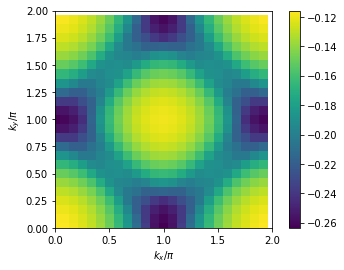

In [7]:
# plot 2D k-dependence of lowest Matsubara frequency of e.g. self-energy
plt.pcolormesh(2*mesh.k1.reshape(nk1,nk2), 2*mesh.k2.reshape(nk1,nk2), np.imag(solver.sigma[mesh.iw0_f].reshape(mesh.nk1,mesh.nk2)), shading='auto')
ax = plt.gca()
ax.set_xlabel('$k_x/\pi$')
ax.set_xlim([0,2])
ax.set_ylabel('$k_y/\pi$')
ax.set_ylim([0,2])
ax.set_aspect('equal')
plt.colorbar()
plt.show()

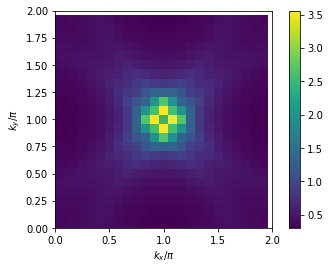

In [8]:
# plot 2D k-dependence of lowest Matsubara frequency of e.g. chi_spin
plt.pcolormesh(2*mesh.k1.reshape(nk1,nk2), 2*mesh.k2.reshape(nk1,nk2), np.real(solver.chi_spin[mesh.iw0_b].reshape(mesh.nk1,mesh.nk2)), shading='auto')
ax = plt.gca()
ax.set_xlabel('$k_x/\pi$')
ax.set_xlim([0,2])
ax.set_ylabel('$k_y/\pi$')
ax.set_ylim([0,2])
ax.set_aspect('equal')
plt.colorbar()
plt.show()

## Example: Interaction dependent renormalization
As a simple example demonstration of our SparseIR TPSC code developed above, we will reproduce Fig. 2 of {cite:p}`Vilk97`. It shows the $U$ dependence of renormalized/effective spin and charge interactions $U_{\mathrm{sp}}$ and $U_{\mathrm{ch}}$ (irreducible vertices) at half filling $n=1$ and $T>T_{\mathrm{crit}}$ for all considered $U$ (i.e. $U_{\mathrm{sp}}<U_{\mathrm{crit}}$ is ensured).

You can simply execute the following two code blocks which will first perform the calculatn and then generate a figure like in the reference above.

Initialization...


Start TPSC loop...


Finished. Plotting now.


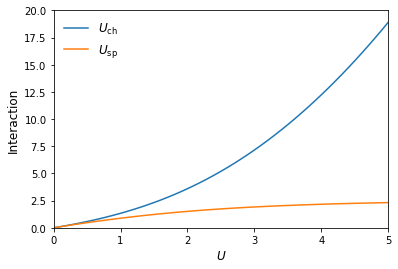

In [9]:
#%%%%%%%%%%%%%%% Parameter settings
print('Initialization...')
# system parameters
t = 1         # hopping amplitude
n = 1         # electron filling, here per spin per lattice site (n=1: half filling)
T = 0.4       # temperature
beta =1/T
U_array = np.linspace(1e-10,5,51)  # Hubbard interaction

W    = 8*t    # bandwidth
wmax = 10     # set wmax >= W

# numerical parameters
nk1, nk2  = 24, 24    # k-mesh sufficiently dense!
nk        = nk1*nk2
IR_tol    = 1e-8      # accuary for l-cutoff of IR basis functions


# initialize meshes
IR_basis_set = sparse_ir.FiniteTempBasisSet(beta, wmax, eps=IR_tol)
mesh = Mesh(IR_basis_set, nk1, nk2)

# set initial self_energy - will be set to previous calculation step afterwards
sigma_init = 0

# empty arrays for results later
U_sp_array = np.empty((len(U_array)))
U_ch_array = np.empty((len(U_array)))


#%%%%%%%%%%%%%%% Calculations for different U values
print("Start TPSC loop...")
for U_it, U in enumerate(U_array):
    #print("Now: U = {:.1f}".format(U))
    
    # TPSC solver
    solver = TPSCSolver(mesh, U, n, verbose=False)
    solver.solve()
    
    # save data for plotting
    U_sp_array[U_it] = solver.U_sp
    U_ch_array[U_it] = solver.U_ch
print("Finished. Plotting now.")


#%%%%%%%%%%%%%%%% Plot results
plt.plot(U_array, U_ch_array, '-', label='$U_{\mathrm{ch}}$')
plt.plot(U_array, U_sp_array, '-', label='$U_{\mathrm{sp}}$')
ax = plt.gca()
ax.set_xlabel('$U$', fontsize=12)
ax.set_xlim([0,5])
ax.set_ylabel('Interaction', fontsize=12)
ax.set_ylim([0,20])
ax.legend(frameon=False, fontsize=12)